In [121]:
import numpy as np
import tensorflow as tf
from scipy.linalg import lstsq
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

### Solving Linear System via Least Squares and Gradient Descent (Original and Stochastic) 

Requires our function to be differentiable and convex

### Example 1 

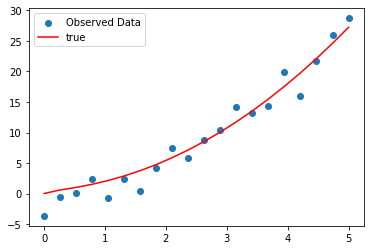

In [348]:
x_train=np.linspace(0,5,20)
def f(x):
    return x**2+np.sqrt(x)
y_train=f(x_train)+4*(-1+2*np.random.rand(20))

plt.scatter(x_train,y_train,label='Observed Data')
plt.plot(x_train,f(x_train),color='red',label='true')
plt.legend()

We wish to model this data via polynomial regression. First solving in the standard least squares approach, we generate features (just polynomial orders)

In [349]:
M = x_train[:, np.newaxis]**[0,1,2]


In [350]:
p, res, rnk, s = lstsq(M, y_train)
print(s)
print("Sum of Squared Residuals is", round(res,2))


[53.57777828  4.16917035  1.24667565]
Sum of Squared Residuals is 56.28


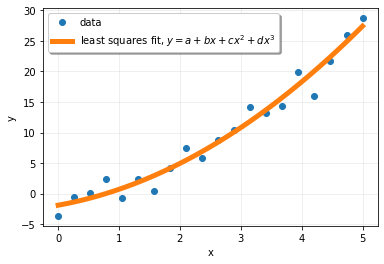

In [356]:
plt.plot(x_train, y_train, 'o', label='data')
xx = np.linspace(0, 5, 100)
yy = p[0] +p[1]*xx+p[2]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a+bx+cx^2+dx^3$',lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Keeping the same Loss function L2 norm but solving numerically via  gradient descent

In [357]:
M = x_train[:, np.newaxis]**[0,1,2]


In [358]:
def gradient_descent(x_train,y_train,learning_rate,max_iter=50000,tol=10):
    '''
    Given training data for feature matrix X and target vector y and a user-specified learning rate solve a least squares problem via gradient descent 
    
    '''
    w=dict(zip([i for i in range(0,x_train.shape[1])],np.random.rand(x_train.shape[1])))
    
    for j in range (0,max_iter):
        pred=x_train*np.array(list(w.values()))
        l1_error=(y_train.T-np.sum(pred,axis=1)) # l1 error for predictions
        l2_error=l1_error**2 # l2 error for predictions 
        
        for i,key in enumerate(w.keys()):
            gradient_scaler=(-2/len(x_train[i]))*np.sum(l1_error.reshape(-1,1)*x_train,axis=0) # differential can be written as matric multiplication
            w[key]=w[key]-learning_rate*gradient_scaler[i]
       
        if abs(np.sum(l2_error)) <tol:
            print("Min Tol Reached at ",j)
            return list(w.values()),l2_error
        
    print("Max Iter reached")
    return list(w.values()),l2_error

In [359]:
weights,error=gradient_descent(M,y_train,0.0001)
print("Weights Vector is", weights)
print("MSE is", np.sum(error))

Max Iter reached
Weights Vector is [-1.9079854088746322, 1.786649791079144, 0.8164351396118595]
MSE is 56.275778476294995


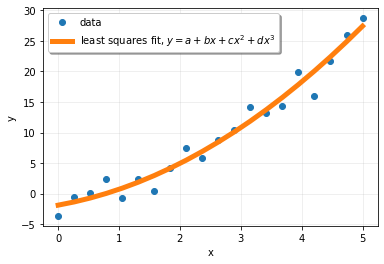

In [360]:
plt.plot(x_train, y_train, 'o', label='data')
xx = np.linspace(0, 5, 20)
yy = weights[0] +weights[1]*xx+weights[2]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a+bx+cx^2+dx^3$',lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Now the comparisons in the MSE values